# Laboratory Guide Lab 1

## Private Mobile Radio Network Planning
### Previous preparation 
- Read description of Radio Mobile application. 
- Read this guide carefully.

### Objectives 
Students will plan a simple Private Mobile Radio Network using Radio Mobile 
application. The network is assumed to be located in the north of Portugal, along the Douro River, providing communications in the 170 MHz band with 20 W transmitters. Initially, only three sites constitute the fixed network, but it is recognized that these sites result into insufficient coverage for mobiles. Students should then find suitable locations for two additional sites, to obtain adequate coverage of the area.

The Radio Mobile application is a tool used to predict the performance of a radio system. It uses digital terrain elevation data for automatic extraction of path profile between an 
emitter and a receiver. This data is added to system considering environmental andstatistical parameters to feed the Irregular Terrain Model (ITS) radio propagation model.The ITS model of radio propagation for frequencies between 20 MHz and 20 GHz (the Longley-Rice model) is a general purpose model that can be applied to a large variety of engineering problems. The model, which is based on electromagnetic theory and on statistical analyses of both terrain features and radio measurements, predicts the median attenuation of a radio signal as a function of distance and the variability of the signal in time and in space. Elevation data is also used to produce altimetry maps in background, which can be merged with other maps from various sources, adding populated places, roads and other geographical features to facilitate location in the area.

This laboratory work will consist of 3 major steps: 
- a) setup and initial radio  network; 
- b) analyse coverage of initial network; 
- c) improve the coverage of the radio network. At the end, students have to produce a focused report and submit it via moodle

# Step A - Setup initial network 
1. Install in your PC the Radio Mobile application. If you download the software from 
moodle you should uncompress the file rm-software.7z. If you download from the 
Radio Mobile site you should follow the site instructions. You may, in alternative,
use the Radio Mobile application installed in the laboratory.
2. Open the application by selecting the file rmweng.exe. You should obtain the 
following window
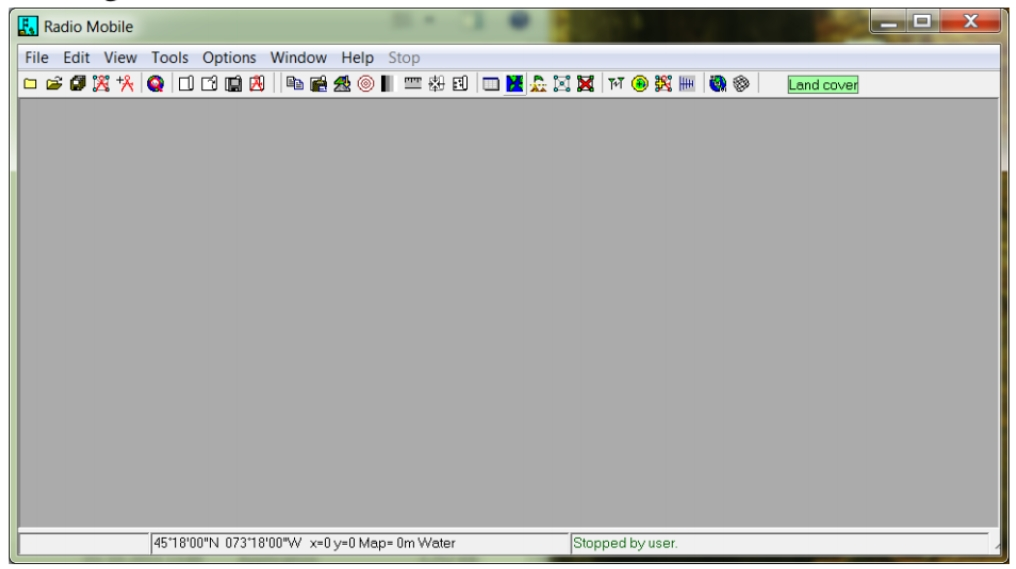

3. Define the map properties for the region of Douro Valley (“File” + “Map Properties”): 
centre point, size of picture (in pixels), size of map (in km). 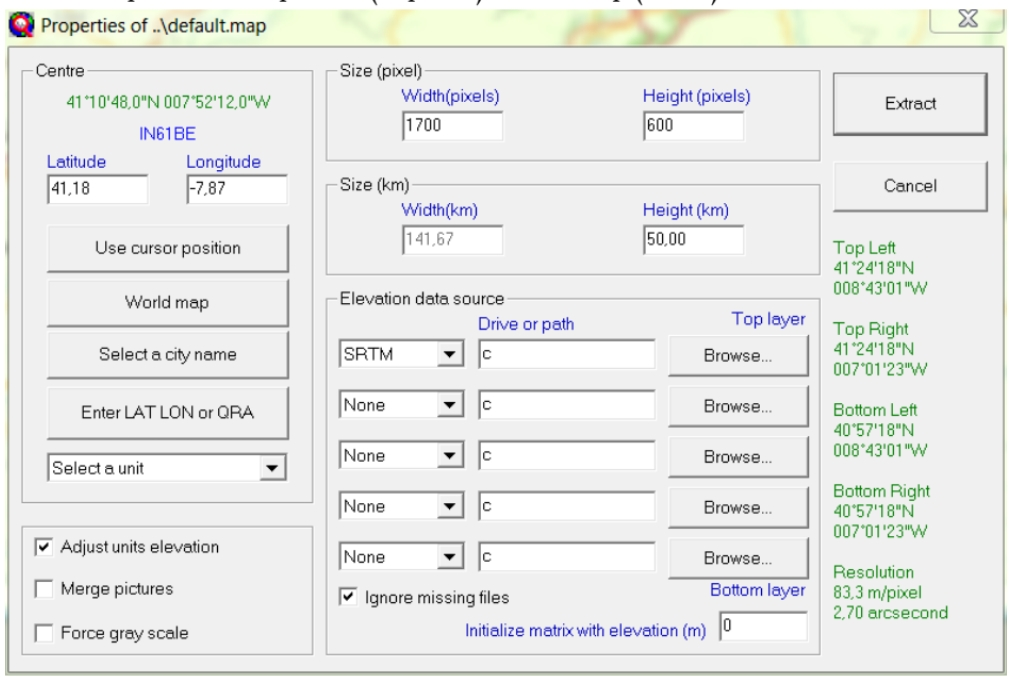

4. Define picture properties (“File” + “Picture Properties”). This option allows to show altimetry data



# Questions 










## Start code

In [15]:
!pip3 install pandas matplotlib

You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python3 -m pip install --upgrade pip' command.


In [16]:
import pandas as pd

def readfile(filepath):
  start_line = "Latitude	Longitude	Rx(dB)	Best unit\n"
  with open(filepath) as f:
      lines = f.readlines()
  count = 0
  for line in lines:
    if start_line == line:
      break
    else: count += 1
  antenas=lines[0:count-1]
  antenas[0:count-1] = lines[1:count]
  print(antenas)
  df = pd.read_csv(filepath, sep="\t",header=count, names=['Latitute', 'Longitude', 'Rx(dB)', 'Best Unit'],decimal=',')
  return df

In [17]:
#Filepaths
tresantenas =  readfile("3antenas.txt")
quatroantenas = readfile("4antenas.txt")
cincoantenas  = readfile("5antenas.txt")
montedavirgem  = readfile("montedavirgem.txt")
sardoura  = readfile("sardoura.txt")

['Mobile unit\t1\tMobile Terminal\t 00,00000\t 000,00000\t0,0\n', 'Fixed unit\t2\tMonte da Virgem\t 41,11313\t-008,59838\t200,1\n', 'Fixed unit\t3\tSardoura\t 41,04918\t-008,31171\t316,6\n', 'Fixed unit\t4\tResende\t 41,13410\t-007,98018\t552,6\n']
['Mobile unit\t1\tMobile Terminal\t 00,00000\t 000,00000\t0,0\n', 'Fixed unit\t2\tMonte da Virgem\t 41,11313\t-008,59838\t200,1\n', 'Fixed unit\t3\tSardoura\t 41,04918\t-008,31171\t316,6\n', 'Fixed unit\t4\tResende\t 41,13410\t-007,98018\t552,6\n', 'Fixed unit\t5\tNova antena 1\t 41,07361\t-007,57917\t968,5\n']
['Mobile unit\t1\tMobile Terminal\t 00,00000\t 000,00000\t0,0\n', 'Fixed unit\t2\tMonte da Virgem\t 41,11313\t-008,59838\t200,1\n', 'Fixed unit\t3\tSardoura\t 41,04918\t-008,31171\t316,6\n', 'Fixed unit\t4\tResende\t 41,13410\t-007,98018\t552,6\n', 'Fixed unit\t5\tNova antena 1\t 41,07361\t-007,57917\t968,5\n', 'Fixed unit\t6\tNova antena 2\t 41,26000\t-007,30861\t882,0\n']
['Mobile unit\t1\tMobile Terminal\t 00,00000\t 000,00000\t0,0

##✅  1. Based on the radio coverage results you obtained for the initial network with three sites (paragraphs 9 and 10), what are the percentages of:


  

In [18]:
import pandas as pd
from IPython.display import display, Markdown

def rxanalisys(df):
  bins=[-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120] #Intervalos a Considerar

  df.hist(column='Rx(dB)',bins=bins)
  #df.hist()
  #df.style
  df.plot.scatter(x=1,y=0,c=2,colormap='inferno')
  
  n = df['Rx(dB)'].value_counts(bins=bins, sort=False).sum()
  print(f"Number of entries: {n}")

  print('\n')

  #sum  every value below 0
  prminus120 = 100*df['Rx(dB)'].value_counts(bins=[-80,0], sort=False).sum()/n
  print(f'Pr < 120dm, in % (sem cobertura): {prminus120:.3f}%\n')
  #sum below 10
  prminus110 = 100*df['Rx(dB)'].value_counts(bins=[-80, 10], sort=False).sum()/n
  print(f'Pr < 110dm, in % (ma cobertura): {prminus110:.3f}%\n')
  

  display(df['Rx(dB)'].value_counts(bins=bins, sort=False).max())

  display(df['Rx(dB)'].value_counts(bins=bins, sort=False).divide(df['Rx(dB)'].value_counts(bins=bins, sort=False).sum()*0.01))


Number of entries: 40800


Pr < 120dm, in % (sem cobertura): 11.343%

Pr < 110dm, in % (ma cobertura): 21.953%



6494

(-80.001, -70.0]     0.000000
(-70.0, -60.0]       0.000000
(-60.0, -50.0]       0.002451
(-50.0, -40.0]       0.090686
(-40.0, -30.0]       0.387255
(-30.0, -20.0]       1.419118
(-20.0, -10.0]       3.068627
(-10.0, 0.0]         6.375000
(0.0, 10.0]         10.610294
(10.0, 20.0]        14.740196
(20.0, 30.0]        15.916667
(30.0, 40.0]        14.806373
(40.0, 50.0]        14.588235
(50.0, 60.0]         9.987745
(60.0, 70.0]         5.620098
(70.0, 80.0]         1.840686
(80.0, 90.0]         0.470588
(90.0, 100.0]        0.075980
(100.0, 110.0]       0.000000
(110.0, 120.0]       0.000000
Name: Rx(dB), dtype: float64

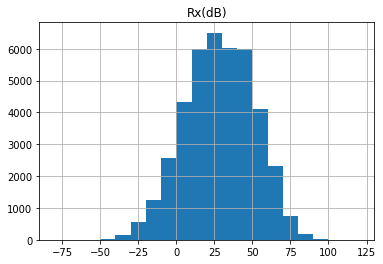

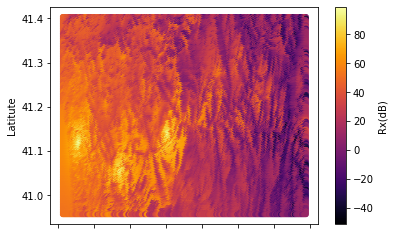

In [19]:
rxanalisys(tresantenas)

###1.1 Area without coverage Pr< -120 dBm?







#### Answer

For $P_r < -120\ dBm$, $R_x < 0$ then:

 $$P(R_x < 0) ≈ P(-80 < R_x < 0) $$

 $$P(R_x< 0)  ≈ 11.343\%$$

###1.2. Area below good coverage Pr< -110 dBm?



 $$P(R_x< 10)  ≈ 21.953\%$$

###1.3. Which of the coverage intervals (in $dB$ with respect to $-120 \ dBm$: $[0,10[, [10,20[, [20,30[, [30,40[, [40,50[, [50,60[, [60, …[$) defines the largest area? What is the percentage of the area that has coverage within that interval?

#### Answer

From the file we see that the the highest percentage is $[20,30[$ with $15.917\%$ 

##✅  2. Find the best location and add one new site to the network (total of four sites). What is the location of the site? What is the new percentage of area below good coverage Pr < -110 dBm? Please include the coverage map and the CoverageData.txt file. 



Number of entries: 40800


Pr < 120dm, in % (sem cobertura): 1.762%

Pr < 110dm, in % (ma cobertura): 6.831%



8232

(-80.001, -70.0]     0.000000
(-70.0, -60.0]       0.000000
(-60.0, -50.0]       0.000000
(-50.0, -40.0]       0.000000
(-40.0, -30.0]       0.000000
(-30.0, -20.0]       0.046569
(-20.0, -10.0]       0.252451
(-10.0, 0.0]         1.463235
(0.0, 10.0]          5.068627
(10.0, 20.0]         9.953431
(20.0, 30.0]        15.698529
(30.0, 40.0]        20.034314
(40.0, 50.0]        20.176471
(50.0, 60.0]        16.840686
(60.0, 70.0]         7.473039
(70.0, 80.0]         2.365196
(80.0, 90.0]         0.541667
(90.0, 100.0]        0.083333
(100.0, 110.0]       0.002451
(110.0, 120.0]       0.000000
Name: Rx(dB), dtype: float64

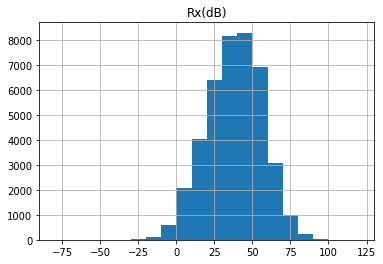

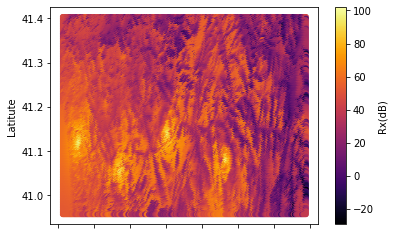

In [20]:
rxanalisys(quatroantenas)

##✅ 3. Find the best location for two new sites to the network (total of five sites: note that both of the two new sites you created can be different from the new site you created in question 2). What is the location of the sites? What is the new percentage of area below good coverage Pr < -110dBm? Please include the coverage map and the CoverageData.txt file.


Number of entries: 47785


Pr < 120dm, in % (sem cobertura): 0.410%

Pr < 110dm, in % (ma cobertura): 2.112%



11412

(-80.001, -70.0]     0.000000
(-70.0, -60.0]       0.000000
(-60.0, -50.0]       0.000000
(-50.0, -40.0]       0.000000
(-40.0, -30.0]       0.000000
(-30.0, -20.0]       0.000000
(-20.0, -10.0]       0.056503
(-10.0, 0.0]         0.353667
(0.0, 10.0]          1.701371
(10.0, 20.0]         5.662865
(20.0, 30.0]        13.554463
(30.0, 40.0]        20.945904
(40.0, 50.0]        23.881971
(50.0, 60.0]        21.676258
(60.0, 70.0]         8.845872
(70.0, 80.0]         2.640996
(80.0, 90.0]         0.598514
(90.0, 100.0]        0.079523
(100.0, 110.0]       0.002093
(110.0, 120.0]       0.000000
Name: Rx(dB), dtype: float64

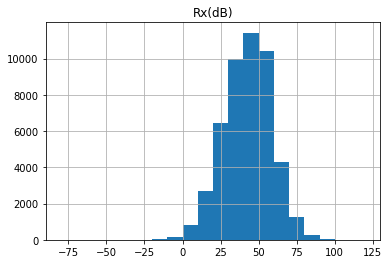

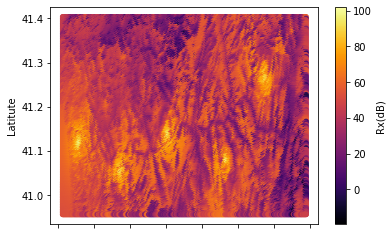

In [21]:
rxanalisys(cincoantenas)

##✅ 4. By setting the “Draw size” resolution to 5 pixels ("Tools"+"Radio coverage"+"Combined cartesian"), there are a set of distinct locations evaluated for coverage within the map. The CoverageData.txt log file (text file you get when you perform radio coverage test) has a distinct column named “Best unit” which determines the site (base station) which gives the best coverage for a given location. Once you determine the best position for the two new sites (question 3), parse the CoverageData.txt and determine:

  

Number of entries: 47785


Pr < 120dm, in % (sem cobertura): 0.410%

Pr < 110dm, in % (ma cobertura): 2.112%



11412

(-80.001, -70.0]     0.000000
(-70.0, -60.0]       0.000000
(-60.0, -50.0]       0.000000
(-50.0, -40.0]       0.000000
(-40.0, -30.0]       0.000000
(-30.0, -20.0]       0.000000
(-20.0, -10.0]       0.056503
(-10.0, 0.0]         0.353667
(0.0, 10.0]          1.701371
(10.0, 20.0]         5.662865
(20.0, 30.0]        13.554463
(30.0, 40.0]        20.945904
(40.0, 50.0]        23.881971
(50.0, 60.0]        21.676258
(60.0, 70.0]         8.845872
(70.0, 80.0]         2.640996
(80.0, 90.0]         0.598514
(90.0, 100.0]        0.079523
(100.0, 110.0]       0.002093
(110.0, 120.0]       0.000000
Name: Rx(dB), dtype: float64

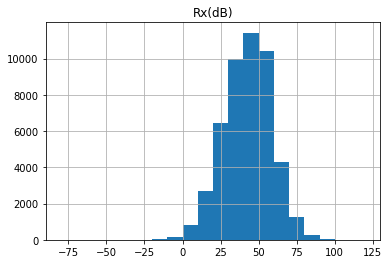

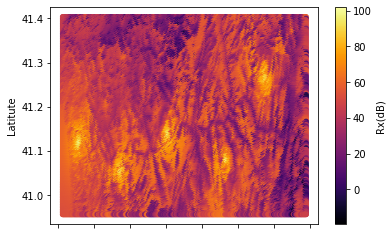

In [22]:
rxanalisys(cincoantenas)

### 4.1 How many locations have the newly added sites (either of the two new sites) as the “Best unit”?

Number of locations with Site 5 and 6 as best: 15045



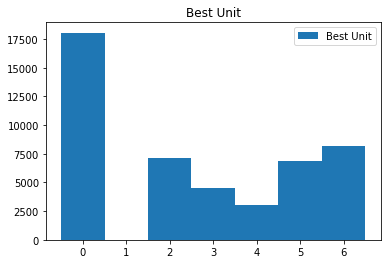

In [23]:
cincoantenas.hist(column='Best Unit', bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5],  legend=True, grid=False)
nsite1and2 = cincoantenas['Best Unit'].value_counts(bins=[4.5,6.5], sort=False).sum() # New site are sites 5 and 6
print(f'Number of locations with Site 5 and 6 as best: {nsite1and2}\n')

### 4.2 Calculate the number of locations that are assigned to each new site (i.e., number of locations that have NewSite1 as “Best unit” and number of locations that have NewSite2 as “Best unit”. In your opinion, is it better if the new sites you created have approximately the same number of locations or not? Explain.


Number Site 1: 6832

Number Site 2: 8213



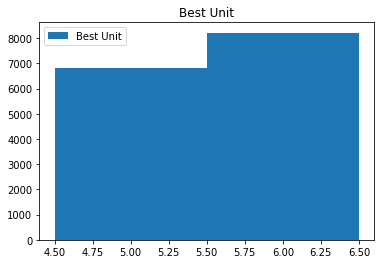

In [24]:
cincoantenas.hist(column='Best Unit', bins=[4.5,5.5,6.5],  legend=True, grid=False)
nsite1 = cincoantenas['Best Unit'].value_counts(bins=[4.5,5.5], sort=False).sum()
print(f'Number Site 1: {nsite1}\n')
nsite2 = cincoantenas['Best Unit'].value_counts(bins=[5.5,6.5], sort=False).sum()
print(f'Number Site 2: {nsite2}\n')

## 5. Explain briefly the method you used for deciding where to locate the two new sites (i.e., point out the most important factors in determining the location of new sites).

### Anwser 5

The priorities to choose a site should be:
- Altitute
  - so that we improve the range by diminishing shadowing and path loss and to be in a an area that is not very well covered. 
- Coverage from the other sites
  - so that that the percentage of coverage overall increases


## ✅  6. Discuss briefly how Radio Mobile program could be used to evaluate the carrier to interference ratios between two sites operating at the same frequency.

### Anwser 6

The ${Carrier\ to\ Interference\ Ratio\ (\mathbf{CIR})}$ relates the power the carrier transmits to interference present in the moment. If we say one of sites  Site 1 ($S_1$) is the one transmitting and  Site 2 ($S_2$) is generating the interferance,  we can say that the $\mathbf{CIR}$ of the pair is: 
$$ CIR_w =  \frac{C_w}{I_w}$$
where $C_w$ is the carrier power in watts and $I_w$ is the interference or noise power in watts. Assuming what we said earlier, we can replace $C_w$ with $S_{1_{w}}$ and $I_w$ with $S_{2_{w}}$, giving us:
$$ CIR_w =  \frac{S_{1_{w}}}{S_{2_{w}}}$$

Since the values we get from the from the program are in dB we can change the expression to a logarithimic scale by:
$$ CIR_{dB} = S_{1_{dB}} - S_{2_{dB}}$$

Afer this we can see that, subtracting the value of $S_{2_{dB}}$ from $S_{1_{dB}}$ gives us the $CIR$ between the two sites that we wanted

In [25]:
import pandas as pd
from IPython.display import display, Markdown

def interferenceanalisys(dfx, dfy):
  idf =  pd.merge(dfx, dfy, on=['Latitute', 'Longitude'])
  idf.pop('Best Unit_x')
  idf.pop('Best Unit_y')
  idf["CIR(dB)"] = idf['Rx(dB)_x']  - idf['Rx(dB)_y']
  idf.plot.scatter(x=1,y=0,c=4,colormap='inferno', xlabel='Latitude', ylabel='Longitude')
  display(idf.head())



,Latitute,Longitude,Rx(dB)_x,Rx(dB)_y,CIR(dB)
0,41.40347,-8.71583,1.7,43.7,-42.0
1,41.40347,-8.71083,-5.3,45.0,-50.3
2,41.40347,-8.70584,-0.1,48.6,-48.7
3,41.40347,-8.70085,2.4,46.1,-43.7
4,41.40347,-8.69586,1.1,44.1,-43.0


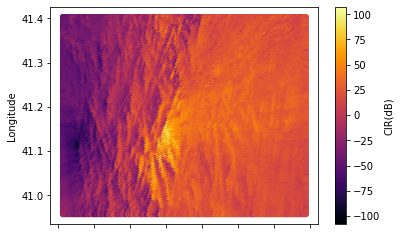

In [26]:
interferenceanalisys(sardoura,montedavirgem)